<a href="https://colab.research.google.com/github/Ratnakar2022/Predicting-sentiment-of-COVID-19-tweets/blob/main/Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

# **Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import re
import string

#for preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#for ML
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix,f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
 # load stop words
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('punkt')
import nltk
nltk.download('averaged_perceptron_tagger')
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

#Loading the Data

In [3]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#reading the data
df=pd.read_csv("/content/drive/MyDrive/AlmaBetter/Sentiment Analysis : Predicting sentiment of COVID-19 tweets/Coronavirus Tweet Sentiment Analysis-20221002T085910Z-001/Coronavirus Tweet Sentiment Analysis/Data _ Resources/Coronavirus Tweets.csv",encoding='latin-1')

In [5]:
#Exploring top 5 data
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [6]:
#Exploring bottom 5 data
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [7]:
#total number of data
df.shape

(41157, 6)

As we can see above we have total 41157 data and 6 column.

In [8]:
# getting summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


Here we get that 4 column is Object data type and 2 column in Int data type. As we wonder how can name can be in INT data type. Well beacuse of user's privacy,the Username and ScreenName is encoded in dataset.

In [9]:
# Check for duplicated entries.
print("Duplicate entry in data:",len(df[df.duplicated()]))

Duplicate entry in data: 0


In [10]:
# Creating Function for Dtype,Unique values and Null values
def datainfo():
    temp_ps = pd.DataFrame(index=df.columns)
    temp_ps['DataType'] = df.dtypes
    temp_ps["Non-null_Values"] = df.count()
    temp_ps['Unique_Values'] = df.nunique()
    temp_ps['NaN_Values'] = df.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(df))*100 
    return temp_ps

In [11]:
datainfo()

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
UserName,int64,41157,41157,0,0.000000
ScreenName,int64,41157,41157,0,0.000000
Location,object,32567,12220,8590,20.871298
TweetAt,object,41157,30,0,0.000000
OriginalTweet,object,41157,41157,0,0.000000
Sentiment,object,41157,5,0,0.000000


Here is the all information about dataset. Null value is not there in any column except location column.

In [12]:
# statistics info
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
UserName,41157.0,NaN,NaN,NaN,24377.0,11881.146851,3799.0,14088.0,24377.0,34666.0,44955.0
ScreenName,41157.0,NaN,NaN,NaN,69329.0,11881.146851,48751.0,59040.0,69329.0,79618.0,89907.0
Location,32567,12220,London,540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TweetAt,41157,30,20-03-2020,3448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OriginalTweet,41157,41157,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sentiment,41157,5,Positive,11422,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Describe works only for numeric data. here is every column have Object dat type.
Beacuse of user's privacy,the Username and ScreenName is encoded as Integer in dataset.so that min max does not work for us here.



# Exploratory Analysis and Visualization

In [13]:
# Getting unique values of 'TweetAt' column

df['TweetAt'].unique() 

array(['16-03-2020', '17-03-2020', '18-03-2020', '19-03-2020',
       '20-03-2020', '21-03-2020', '22-03-2020', '23-03-2020',
       '24-03-2020', '25-03-2020', '26-03-2020', '27-03-2020',
       '28-03-2020', '29-03-2020', '30-03-2020', '31-03-2020',
       '01-04-2020', '02-04-2020', '03-04-2020', '04-04-2020',
       '05-04-2020', '06-04-2020', '07-04-2020', '08-04-2020',
       '09-04-2020', '10-04-2020', '11-04-2020', '12-04-2020',
       '13-04-2020', '14-04-2020'], dtype=object)

In [14]:
# function to change the string format to date

from datetime import datetime

def change_to_timestamp(column):
  return datetime.strptime(column, '%d-%m-%Y')

In [15]:
# applying the above function to 'TweetAt' column

df['TweetAt'] = df['TweetAt'].apply(change_to_timestamp)


In [16]:
# getting the month number from 'TweetAt' column

df['TweetMonth'] = df['TweetAt'].apply(lambda x : x.month)

In [17]:
df['TweetAt'][0]

Timestamp('2020-03-16 00:00:00')

In [18]:
# filling null values in 'Location' column

df["Location"].fillna(df['Location'].mode().iloc[0],inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UserName       41157 non-null  int64         
 1   ScreenName     41157 non-null  int64         
 2   Location       41157 non-null  object        
 3   TweetAt        41157 non-null  datetime64[ns]
 4   OriginalTweet  41157 non-null  object        
 5   Sentiment      41157 non-null  object        
 6   TweetMonth     41157 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 2.2+ MB


Now we can see that no null value is coming in Location column

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Tweets distributions')

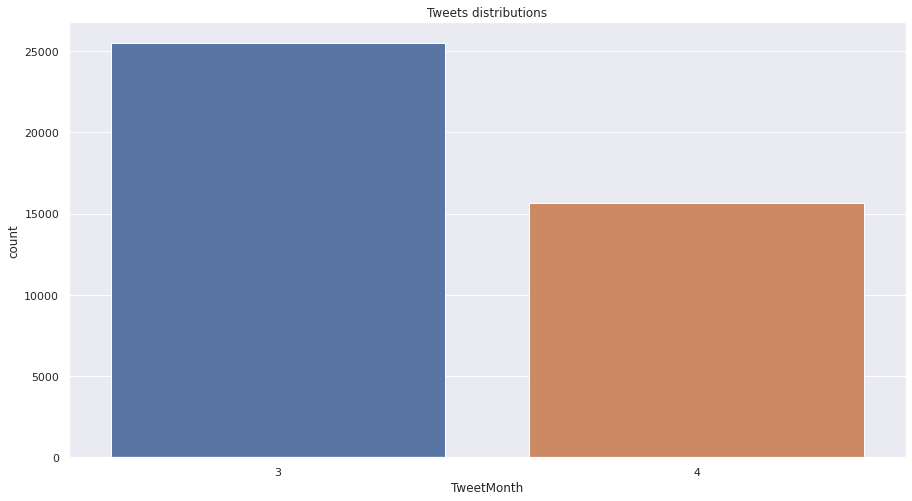

In [21]:
# getting count of months 3 and 4 

sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(x=df['TweetMonth'])
plt.title('Tweets distributions')

We can see the above graph that more tweet was tweeted in month of March.

In [22]:
# getting differant dates from the unique months

list_of_month_3 = []
list_of_month_4 = []
for i in range(len(df['TweetAt'])):
  if df['TweetAt'][i].month == 3:
    list_of_month_3.append(df['TweetAt'][i].day)
  if df['TweetAt'][i].month == 4:
    list_of_month_4.append(df['TweetAt'][i].day) 

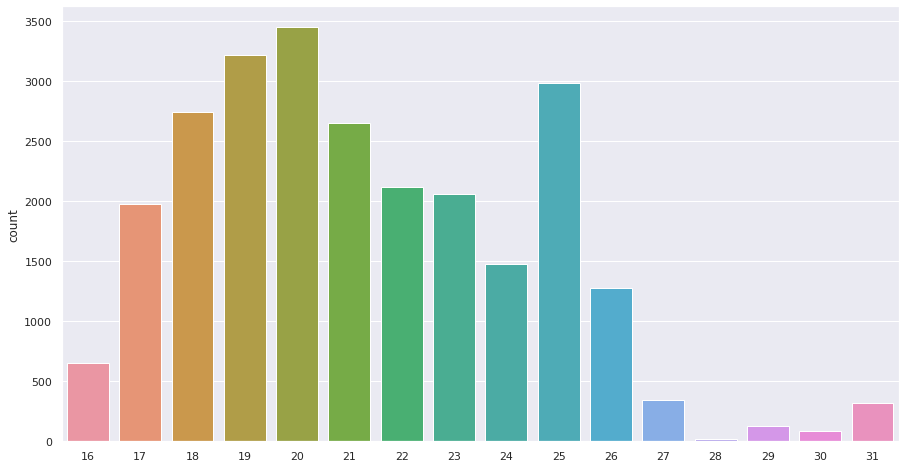

In [23]:
# plotting the frequency of the tweets from month 3 (march)

sns.countplot(x=list_of_month_3)

As we can see that above graph users were most active between 17/03 to 26/03

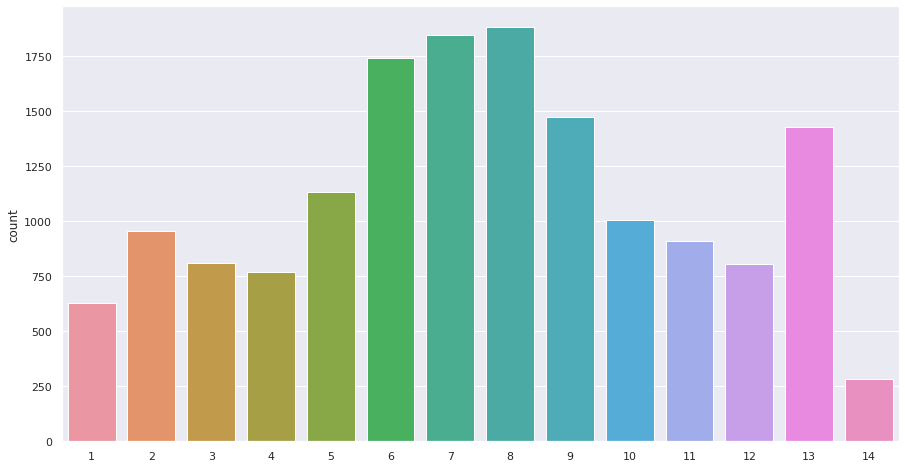

In [24]:
# plotting the frequency of the tweets from month 4 (april)

sns.countplot(x=list_of_month_4)

Here we can see Users were most active between 06/04 to 09/04

Text(0.5, 1.0, 'Sentiment distributions')

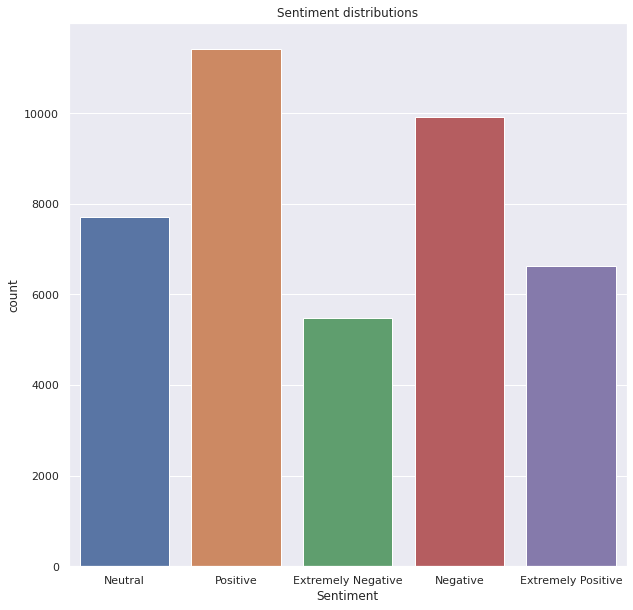

In [25]:
# Plotting different sentiment distributions

plt.figure(figsize=(10,10))
sns.countplot(x=df['Sentiment'])
plt.title('Sentiment distributions')

Above graph shows that the count of positive tweets are highest and extremely negative tweets are very less.



In [26]:
analysis_1= df.groupby("Sentiment").count()['OriginalTweet'].reset_index().sort_values(by='OriginalTweet',ascending=False)
analysis_1

,Sentiment,OriginalTweet
4,Positive,11422
2,Negative,9917
3,Neutral,7713
1,Extremely Positive,6624
0,Extremely Negative,5481


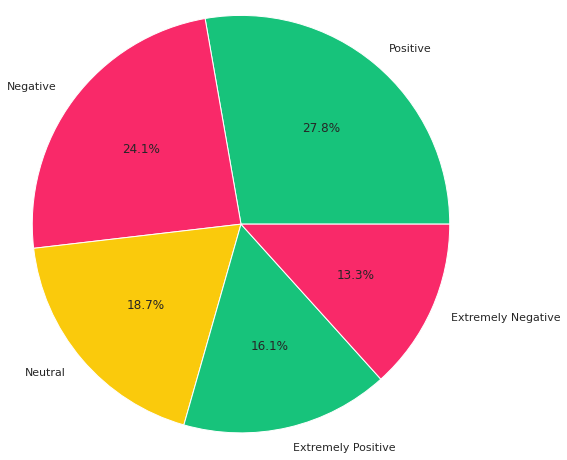

In [27]:
# count plot on Sentiment categorical variable
percent_class = analysis_1['OriginalTweet']
labels= analysis_1.Sentiment
colors = ['#17C37B','#F92969','#FACA0C']
fig=plt.pie(percent_class,labels=labels,colors=colors,autopct="%.1f%%",radius =1.2)

In [28]:
# sneak peek of positive, negative and neutral tweets
list(df.loc[df["Sentiment"]=='Negative','OriginalTweet'])[0]


"For corona prevention,we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes. Also we should prefer online shopping from our home. It's time to fight against COVID 19?. #govindia #IndiaFightsCorona"

In [29]:
list(df.loc[df["Sentiment"]=='Positive','OriginalTweet'])[0]


'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order'

In [30]:
list(df.loc[df["Sentiment"]=='Neutral','OriginalTweet'])[0]


'@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'

In [31]:
Top_Location_Of_tweet= df['Location'].value_counts().head(10)

In [32]:
# dataframe containing locations and their tweet counts  

Top_Location_Of_tweet_df=pd.DataFrame(Top_Location_Of_tweet)
Top_Location_Of_tweet_df.reset_index(inplace=True)
Top_Location_Of_tweet_df.rename(columns={'index':'Location', 'Location':'Location_Count'}, inplace=True)
Top_Location_Of_tweet_df

,Location,Location_Count
0,London,9130
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
5,United Kingdom,337
6,"Los Angeles, CA",281
7,India,268
8,UK,232
9,Australia,225


London is the place from where most tweets were made.

In [33]:
# dataframe containing dates and tweet counts in the month of march

date_count = df.groupby("TweetAt").count()["OriginalTweet"]
date_count_df = pd.DataFrame(date_count)
date_count_df.sort_values(by=['OriginalTweet'],ascending=False).head(10)

,OriginalTweet
TweetAt,
2020-03-20,3448
2020-03-19,3215
2020-03-25,2979
2020-03-18,2742
2020-03-21,2653
2020-03-22,2114
2020-03-23,2062
2020-03-17,1977
2020-04-08,1881


On 20/03 most tweets were made.

In [34]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,TweetMonth
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,3
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,3
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,3
3,3802,48754,London,2020-03-16,My food stock is not the only one which is emp...,Positive,3
4,3803,48755,London,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,3


In [35]:
len(list(df['UserName'].unique()))

41157

**Word cloud for negative statements**

In [36]:
neg_phrases = df[df.Sentiment == 'Negative']
neg_words = []
for t in neg_phrases.OriginalTweet:
    neg_words.append(t)
neg_words[:4]

["For corona prevention,we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes. Also we should prefer online shopping from our home. It's time to fight against COVID 19?. #govindia #IndiaFightsCorona",
 '@10DowningStreet @grantshapps what is being done to ensure food and other essential products are being re-stocked at supermarkets and panic buying actively discouraged? It cannot be left to checkout staff to police the actions of the selfish and profiteer',
 'In preparation for higher demand and a potential food shortage, The Hunger Coalition purchased 10 percent more food and implemented new protocols due to the COVID-19 coronavirus. https://t.co/5CecYtLnYn',
 'Do you see malicious price increases in NYC? The NYC Department of Consumer and Worker Protection (DCWP) has set up a page to digitally file a complaint. Click here: https://t.co/oEx6Y8mm2K\r\r\n\r\r\nTo file a complaint (use the word"Overcharge") https://t.c

In [37]:
neg_text = pd.Series(neg_words).str.cat(sep=' ')
neg_text[:100]

'For corona prevention,we should stop to buy things with the cash and should use online payment metho'

In [38]:
for t in neg_phrases.OriginalTweet[:300]:
    if 'good' in t:
        print(t)




#Covid_19 https://t.co/pzirO10avf
People seen stocking up on goods into trolleys after the panic buying rumours spread today at hypermarket in Kajang March 16 2020 Picture by Shafwan Zaidon



yet, Korea's supermarket never out of stock while Malaysia.....empty shelf here and there. The government should totally consider on limiting some necessity goods to every consumer in the market.
@nytopinion @McDonalds @SUBWAY @ChickfilA @CrackerBarrel @Outback @Cheesecake You asked the workers, we asked the restaurants! HereÂs what the top 20 are offering during the outbreak (hint: itÂs not good): https://t.co/e2ZNXajPre

#CoronavirusOutbreak #coronavirus #CoronaVirusUpdates #panicbuying #COVID2019 #COVID19 #COVID?19 #Repost #QuarantineLife #QuarantineAndChill #SocialDistance #StayTheFHome #Corona #wtf https://t.co/yQrUtMwgw9








Thread ?
Seattle to provide $800 in supermarket vouchers to thousands of families during coronavirus crisis, mayor says https://t.co/jupy1W34KK to more than 6,

In [39]:
pos_phrases = df[df.Sentiment == "Positive"] ## 4 is positive sentiment
pos_string = []
for t in pos_phrases.OriginalTweet:
    pos_string.append(t)
pos_text = pd.Series(pos_string).str.cat(sep=' ')
pos_text[:100]

'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbe'

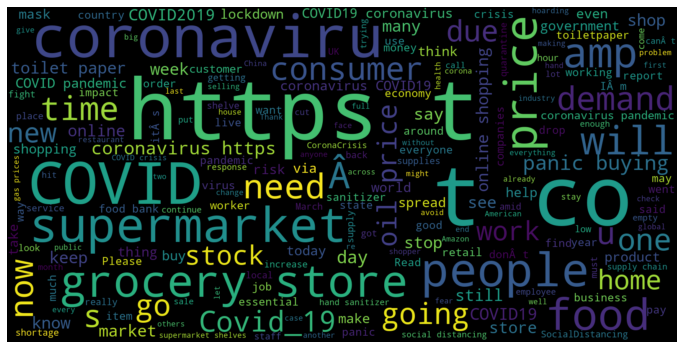

In [40]:
# Extracting word cloud for negative statements

from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(neg_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Word Cloud for Positive Statements**

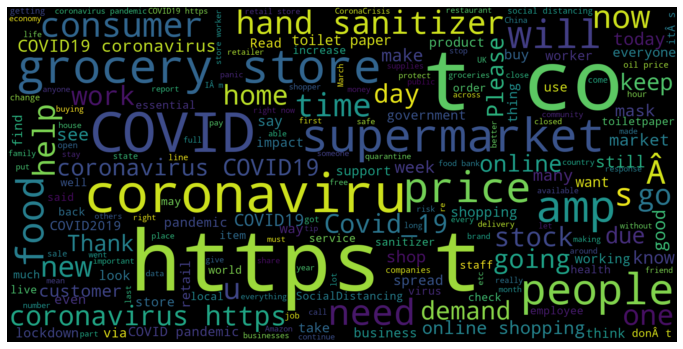

In [41]:
# Extracting word cloud for positive statements

wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(pos_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
# copying the data to use on other methods
df1=df.copy()
DF= df.copy()

# Method 1: Tf-Idf Approach

**Preprocessing data **

In [43]:
# dropping irrelevant columns from the dataset

df1.drop(['UserName','ScreenName','Location','TweetAt'],axis=1,inplace=True)

In [44]:
# function to preprocess the data

def preprocessing_text(data):
  data =data.lower()
  data = re.sub(r'http\S+|www\S+|https\S',' ',data,flags=re.MULTILINE)
  data = data.translate(str.maketrans('','',string.punctuation))
  data = re.sub(r'\@\w+|\#'," ", data)
  data_token = word_tokenize(data)
  filtered_words = [word for word in data_token if word not in stop_words]
  ps = PorterStemmer()
  stemmed_words = [ps.stem(w) for w in filtered_words]
  lemmatizer = WordNetLemmatizer()
  lemma_words = [lemmatizer.lemmatize(w,pos='a') for w in stemmed_words]
  return ' '.join(lemma_words)

In [45]:
# applying the above function
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [46]:
df1['Processed_text'] = df1['OriginalTweet'].apply(preprocessing_text)


In [47]:
df1.head()

,OriginalTweet,Sentiment,TweetMonth,Processed_text
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,3,menyrbi philgahan chrisitv
1,advice Talk to your neighbours family to excha...,Positive,3,advic talk neighbour famili exchang phone numb...
2,Coronavirus Australia: Woolworths to give elde...,Positive,3,coronaviru australia woolworth give elderli di...
3,My food stock is not the only one which is emp...,Positive,3,food stock one empti pleas dont panic enough f...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,3,readi go supermarket covid19 outbreak im paran...


In [48]:
# Extracting unique sentiments 

df1['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [49]:
# Encoding and simplifying sentiments

encoders_nums = {"Sentiment":{"Neutral": 'Neutral' ,"Positive": 'Positive','Extremely Negative':'Negative','Extremely Positive':'Positive','Negative':'Negative'}}
df1 = df1.replace(encoders_nums)

In [50]:
df1['Sentiment'].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

# Model Training

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')


In [54]:
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df1['Processed_text'])
tfidf

<41157x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 459294 stored elements in Compressed Sparse Row format>

In [56]:
# Assigning dependent and independent variables

x = df1.Processed_text
y = df1.Sentiment

# splitting data into train and test sets

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 225)
print('x_train: ',len(x_train))
print('x_test: ',len(x_test))
print('y_train: ',len(y_train))
print('y_test: ',len(y_test))

x_train:  37041
x_test:  4116
y_train:  37041
y_test:  4116


In [57]:
tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = 'lbfgs')

In [58]:
from sklearn.pipeline import Pipeline

In [59]:
# training model

model = Pipeline([('vectorizer',tvec),('classifier',clf2)])
model.fit(x_train,y_train)


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
# Getting predictions on train and test sets

predictions = model.predict(x_test)
prediction_train = model.predict(x_train)

[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'positive'), Text(0, 2.5, 'negative')]

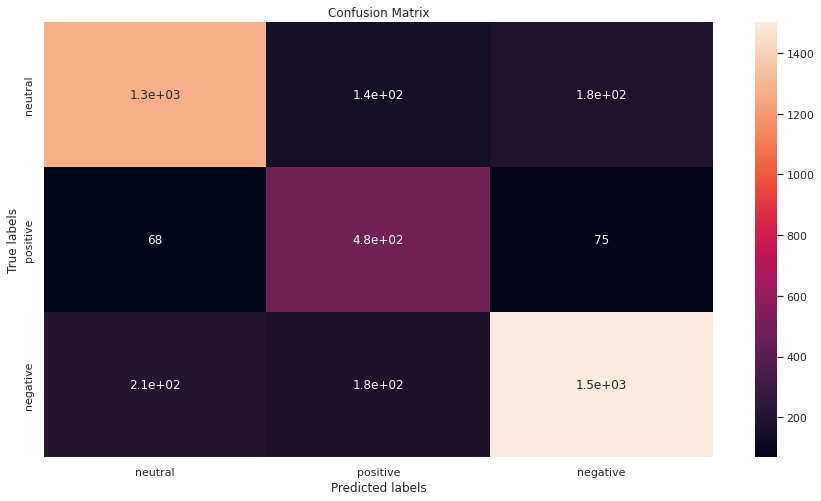

In [62]:
# Extracting confusion matrix for test predictions

cm_test = confusion_matrix(predictions,y_test)
ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax) #annot=True to annotate cells
labels = ['neutral', 'positive','negative']
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'positive'), Text(0, 2.5, 'negative')]

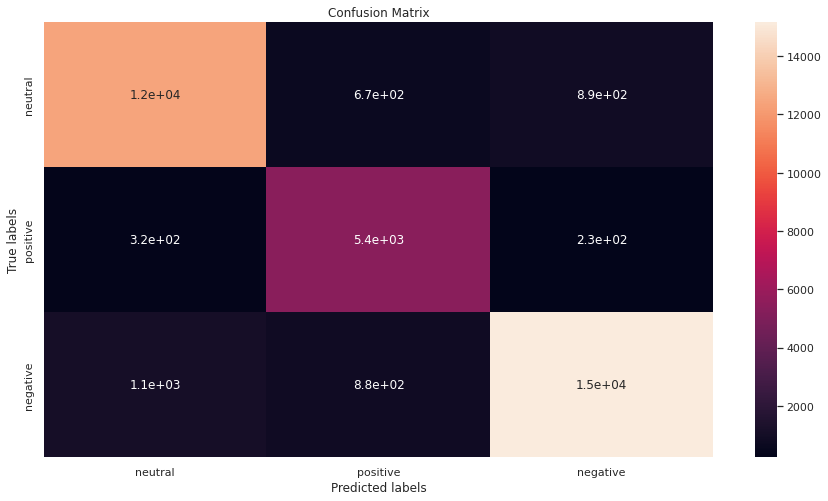

In [63]:
# Extracting confusion matrix for train predictions

cm_train = confusion_matrix(prediction_train,y_train)
ax= plt.subplot()
sns.heatmap(cm_train, annot=True, ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [64]:
# Getting differant metrics for train set

print('Accuracy score of train set: ',accuracy_score(prediction_train,y_train))
print('Precission of train set: ',precision_score(prediction_train,y_train, average = 'weighted'))
print('Recall of train set: ',recall_score(prediction_train,y_train, average = 'weighted'))

Accuracy score of train set:  0.8908776760886585
Precission of train set:  0.8948535506549515
Recall of train set:  0.8908776760886585


In [65]:
# Getting differant metrics for test set

print('Accuracy score of test set: ',accuracy_score(predictions,y_test))
print('Precission of test set: ',precision_score(predictions,y_test, average = 'weighted'))
print('Recall of test set: ',recall_score(predictions,y_test, average = 'weighted'))

Accuracy score of test set:  0.7920310981535471
Precission of test set:  0.802662900884536
Recall of test set:  0.7920310981535471


In [66]:
# Getiing classification report for train and test sets
print('Test set report')
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print('Train set report')
print("\n")
print(classification_report(y_train,prediction_train))

Test set report


              precision    recall  f1-score   support

    Negative       0.80      0.82      0.81      1552
     Neutral       0.77      0.60      0.67       803
    Positive       0.80      0.85      0.82      1761

    accuracy                           0.79      4116
   macro avg       0.79      0.76      0.77      4116
weighted avg       0.79      0.79      0.79      4116



Train set report


              precision    recall  f1-score   support

    Negative       0.89      0.90      0.89     13846
     Neutral       0.91      0.78      0.84      6910
    Positive       0.89      0.93      0.91     16285

    accuracy                           0.89     37041
   macro avg       0.89      0.87      0.88     37041
weighted avg       0.89      0.89      0.89     37041



# Try Example

In [67]:
example = ['Today is a good day']
result = model.predict(example)
print(result)

['Positive']


# Model Saving as Pickle file

In [68]:
import pickle
 
filename = 'sentiment_analysis'
pickle.dump(model,open(filename,'wb'))

# Method 2 : CountVectorizer Approach

**Data Preparation**

In [69]:
####### code to remove unimportant text from the data #######

list_of_tweets = []
b = []
c = []
for i in range(len(DF['OriginalTweet'])):
  a = DF['OriginalTweet'][i].split(' ')
  for j in a:
    if 'https' in j:
      pass
    else:
      b.append(j) 
  c.append(' '.join(b))
  b = []
for l in c:
  list_of_tweets.append(l) 

# assigning 'OriginalTweet' column to the above list

DF['OriginalTweet'] = list_of_tweets

# downloading stopwords

import nltk
nltk.download('stopwords')

import string
from nltk.corpus import stopwords

# function to remove punctuations and stopwords

def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

# processing the text 

DF['OriginalTweet'] = DF['OriginalTweet'].apply(lambda x : text_process(x))


# changing the values in the data accordingly

for i in range(len(DF['Sentiment'])):
  if DF['Sentiment'][i] == 'Extremely Negative':
    DF['Sentiment'][i] = 'Negative'
  elif DF['Sentiment'][i] == 'Extremely Positive':
    DF['Sentiment'][i] = 'Positive'

# providing necessary class values

''' for negative values = -1
        Positive values = 1   
        neutral values = 0 '''

for i in range(len(df['Sentiment'])):
  if DF['Sentiment'][i] == 'Negative':
    DF['Sentiment'][i] = -1
  elif DF['Sentiment'][i] == 'Positive':
    DF['Sentiment'][i] = 1
  elif DF['Sentiment'][i] == 'Neutral': 
    DF['Sentiment'][i] = 0

# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

# applying stemming function

DF['OriginalTweet'] = DF['OriginalTweet'].apply(stemming)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
DF.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,TweetMonth
0,3799,48751,London,2020-03-16,menyrbi philgahan chrisitv,0,3
1,3800,48752,UK,2020-03-16,advic talk neighbour famili exchang phone numb...,1,3
2,3801,48753,Vagabonds,2020-03-16,coronavirus australia woolworth give elder dis...,1,3
3,3802,48754,London,2020-03-16,food stock one empti pleas dont panic enough f...,1,3
4,3803,48755,London,2020-03-16,readi go supermarket covid19 outbreak im paran...,-1,3


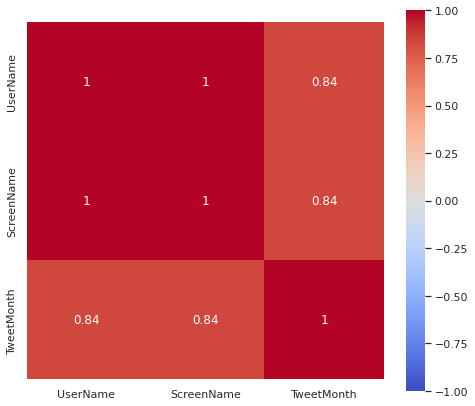

In [71]:
# Extracting correlation heatmap

plt.figure(figsize=(8,7))
sns.heatmap(DF.corr('pearson'),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

As there are less numeric features we are not able to extract information from the correlation between variables.



# Model Training


**Logistic regression**

In [72]:
# vectorizing the data from 'OriginalTweet' column

vectorizer = CountVectorizer(max_df = 0.9,min_df = 10)
X = vectorizer.fit_transform(DF['OriginalTweet'])

# assigning dependent and independent variables

X = X.toarray() 
y = DF['Sentiment']
y=y.astype('int')

In [73]:
# Splitting data into train and test sets

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 225)
print('x_train shape: ',x_train.shape)
print('x_test shape: ',x_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)

x_train shape:  (32925, 5121)
x_test shape:  (8232, 5121)
y_train shape:  (32925,)
y_test shape:  (8232,)


In [74]:
# applying logistic regression model

model = LogisticRegression(multi_class='ovr', solver='lbfgs')
model.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

In [76]:
# getting appropriate predictions on train and test sets

prediction_test = model.predict(x_test)
prediction_train = model.predict(x_train)

# Evaluation Metrics

[[10959   519   837]
 [  426  5011   412]
 [  914   624 13223]]


[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'positive'), Text(0, 2.5, 'negative')]

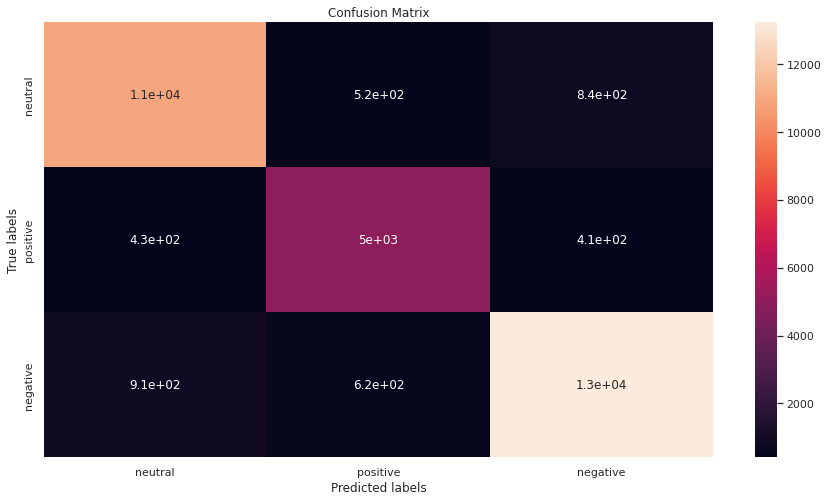

In [77]:
# getting train set confusion matrix

labels = ['neutral', 'positive','negative']
cm_train = confusion_matrix(prediction_train,y_train)
print(cm_train)

ax= plt.subplot()
sns.heatmap(cm_train, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[2523  229  374]
 [ 222 1075  185]
 [ 354  255 3015]]


[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'positive'), Text(0, 2.5, 'negative')]

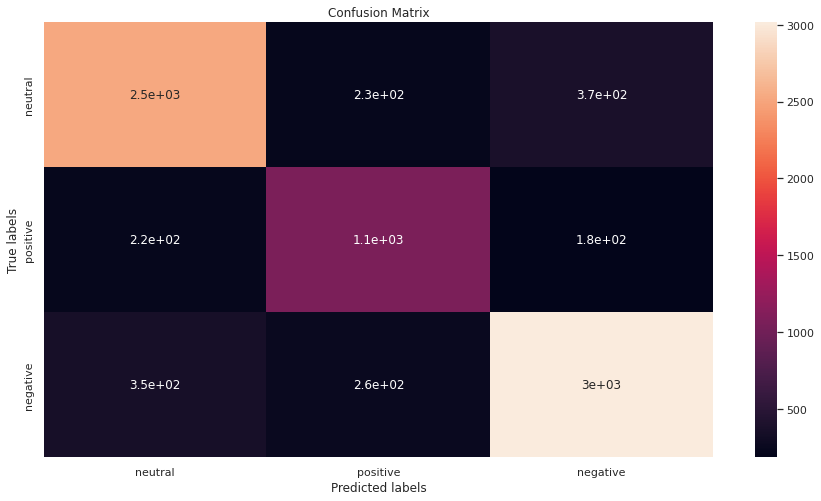

In [78]:
# getting test set confusion matrix

labels = ['neutral', 'positive','negative']
cm_test = confusion_matrix(prediction_test,y_test)
print(cm_test)

ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [79]:
# getting differant scores of train set

print('Accuracy score of train set: ',accuracy_score(prediction_train,y_train))
print('Precision of train set: ',precision_score(prediction_train,y_train, average = 'weighted'))
print('Recall of train set: ',recall_score(prediction_train,y_train, average = 'weighted'))
print('F1-score of train set: ',f1_score(prediction_train, y_train, average='weighted'))

Accuracy score of train set:  0.8866514806378132
Precision of train set:  0.8875615266256266
Recall of train set:  0.8866514806378132
F1-score of train set:  0.8869708854574941


In [80]:
# getting differant scores of test set

print('Accuracy score of test set: ',accuracy_score(prediction_test,y_test))
print('Precision of test set: ',precision_score(prediction_test,y_test, average = 'weighted'))
print('Recall of test set: ',recall_score(prediction_test,y_test, average = 'weighted'))
print('F1-score of test set: ',f1_score(prediction_test, y_test, average='weighted'))

Accuracy score of test set:  0.8033284742468416
Precision of test set:  0.8046727775737095
Recall of test set:  0.8033284742468416
F1-score of test set:  0.8038953821105832


In [81]:
# getting classification report for train and test sets

print('Train set report')
print("\n")
print(classification_report(y_train,prediction_train))
print("\n")
print('Test set report')
print("\n")
print(classification_report(y_test,prediction_test))

Train set report


              precision    recall  f1-score   support

          -1       0.89      0.89      0.89     12299
           0       0.86      0.81      0.83      6154
           1       0.90      0.91      0.90     14472

    accuracy                           0.89     32925
   macro avg       0.88      0.87      0.88     32925
weighted avg       0.89      0.89      0.89     32925



Test set report


              precision    recall  f1-score   support

          -1       0.81      0.81      0.81      3099
           0       0.73      0.69      0.71      1559
           1       0.83      0.84      0.84      3574

    accuracy                           0.80      8232
   macro avg       0.79      0.78      0.79      8232
weighted avg       0.80      0.80      0.80      8232



# Decision trees classifier

In [82]:
# training the model

from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(x_train, y_train)

predictions_test = dtree_model.predict(x_test)
predictions_train = dtree_model.predict(x_train)

# Evaluating metrics

[[ 2387    97   480]
 [    0     0     0]
 [ 9912  6057 13992]]


[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'positive'), Text(0, 2.5, 'negative')]

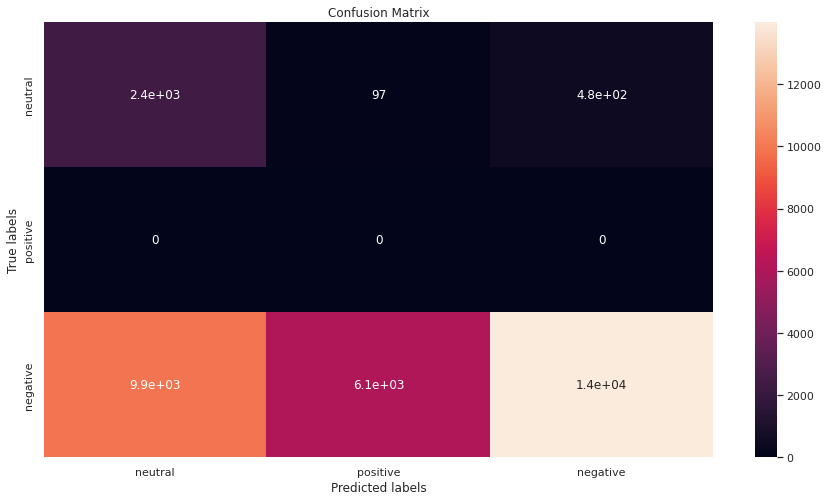

In [83]:
# getting train set confusion matrix

labels = ['neutral', 'positive','negative']
cm_test = confusion_matrix(predictions_train,y_train)
print(cm_test)

ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[ 578   19  153]
 [   0    0    0]
 [2521 1540 3421]]


[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'positive'), Text(0, 2.5, 'negative')]

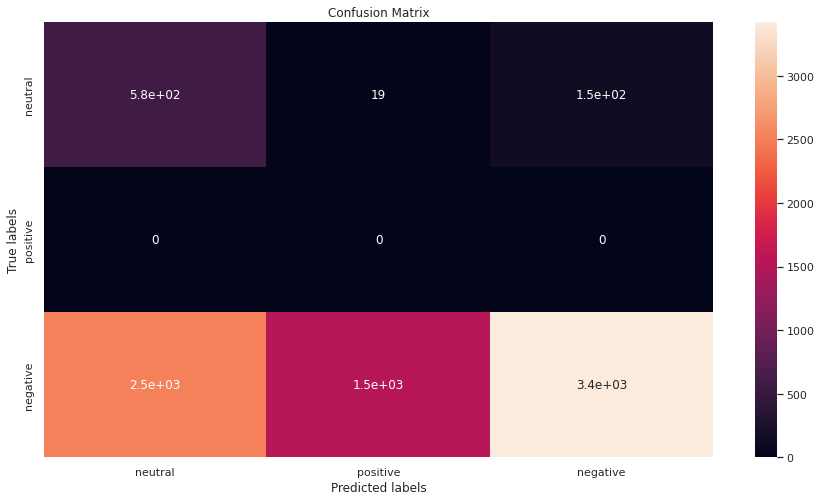

In [84]:
# getting test set confusion matrix

labels = ['neutral', 'positive','negative']
cm_test = confusion_matrix(predictions_test,y_test)
print(cm_test)

ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [85]:
# Print the classification report for train and test

print('Train set report')
print("\n")
print(classification_report(y_train,predictions_train))
print("\n")
print('Test set report')
print("\n")
print(classification_report(y_test,predictions_test))

Train set report


              precision    recall  f1-score   support

          -1       0.81      0.19      0.31     12299
           0       0.00      0.00      0.00      6154
           1       0.47      0.97      0.63     14472

    accuracy                           0.50     32925
   macro avg       0.42      0.39      0.31     32925
weighted avg       0.51      0.50      0.39     32925



Test set report


              precision    recall  f1-score   support

          -1       0.77      0.19      0.30      3099
           0       0.00      0.00      0.00      1559
           1       0.46      0.96      0.62      3574

    accuracy                           0.49      8232
   macro avg       0.41      0.38      0.31      8232
weighted avg       0.49      0.49      0.38      8232



# Multinomial Naive bayes classifier

In [86]:
# training the mdoel

from sklearn.naive_bayes import MultinomialNB
sentiment_model = MultinomialNB().fit(x_train,y_train)

predictions_test = sentiment_model.predict(x_test)
predictions_train = sentiment_model.predict(x_train)

# Evaluating metrics

[[ 9358  1079  2080]
 [ 1042  3762  1220]
 [ 1899  1313 11172]]


[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'positive'), Text(0, 2.5, 'negative')]

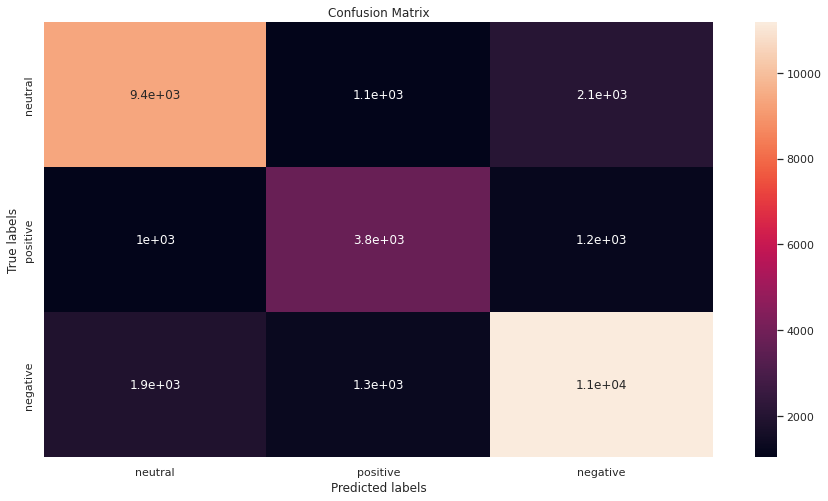

In [87]:
# getting train set confusion matrix

labels = ['neutral', 'positive','negative']
cm_test = confusion_matrix(predictions_train,y_train)
print(cm_test)

ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[2245  327  622]
 [ 298  810  369]
 [ 556  422 2583]]


[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'positive'), Text(0, 2.5, 'negative')]

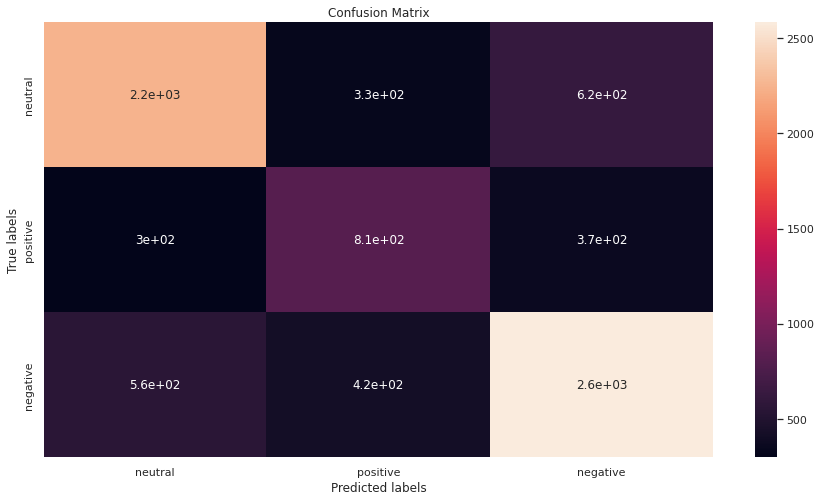

In [88]:
# getting test set confusion matrix

labels = ['neutral', 'positive','negative']
cm_test = confusion_matrix(predictions_test,y_test)
print(cm_test)

ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [89]:
# Print the classification report for train and test

print('Train set report')
print("\n")
print(classification_report(y_train,predictions_train))
print("\n")
print('Test set report')
print("\n")
print(classification_report(y_test,predictions_test))

Train set report


              precision    recall  f1-score   support

          -1       0.75      0.76      0.75     12299
           0       0.62      0.61      0.62      6154
           1       0.78      0.77      0.77     14472

    accuracy                           0.74     32925
   macro avg       0.72      0.71      0.72     32925
weighted avg       0.74      0.74      0.74     32925



Test set report


              precision    recall  f1-score   support

          -1       0.70      0.72      0.71      3099
           0       0.55      0.52      0.53      1559
           1       0.73      0.72      0.72      3574

    accuracy                           0.68      8232
   macro avg       0.66      0.66      0.66      8232
weighted avg       0.68      0.68      0.68      8232



# Hyperparameter tuning

In [90]:
# Tuning and training the model

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])
tuned_parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': [1, 1e-1, 1e-2]
}

In [91]:
# vectorizing the data from 'OriginalTweet' column

vectorizer = CountVectorizer(max_df = 0.9,min_df = 10)
#X = vectorizer.fit_transform(DF['OriginalTweet'])
X = DF['OriginalTweet']
# assigning dependent and independent variables

#X = X.toarray() 
y = DF['Sentiment']
y=y.astype('int')

In [92]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 225)


# Evaluating metrics

In [93]:
# Print the classification report for train and test`

from sklearn.metrics import classification_report
clf = GridSearchCV(text_clf, tuned_parameters, cv=4)
clf.fit(list(x_train), list(y_train))
print('Test set report')
print("\n")
print(classification_report(list(y_test), clf.predict(list(x_test)), digits=2))

Test set report


              precision    recall  f1-score   support

          -1       0.69      0.71      0.70      3099
           0       0.78      0.15      0.25      1559
           1       0.63      0.83      0.72      3574

    accuracy                           0.66      8232
   macro avg       0.70      0.56      0.56      8232
weighted avg       0.68      0.66      0.62      8232



# **Conclusions**


* The dataset given to contains 3 Categorical values i.e positive,negative,neutral 
which is a multiclass dataset, because of which hyperparameter tuning was difficult.
*  By the use of EDA we gain relevant insights such as which sentiment of tweet was high in number and presence of null values.

*  We use two types of methods which are TF-IDF method and countvectorizer method helped us achieve different results.
*   Logistic regression proved to be the best model amongst all models used.
*   The results we were able to obtain using all the methods are acceptable given the size and irrelevance in the dataset.
